# The Sparks Foundation

## Data Science and Business Analysis Internsip #Task2

### Topic - From the given 'Iris' Dataset, predict the optimum numbers of clusters, and represent it visually.

K- Means Clustering

## Author : Shraawani Lattoo

#### Importing Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

#### Load Data

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<AxesSubplot:>

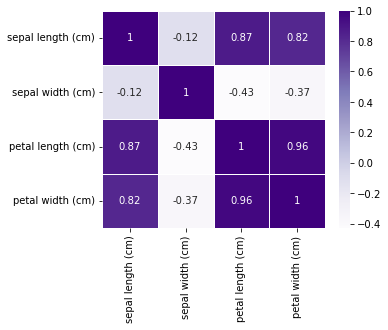

In [7]:
plt.figure(figsize=(5,4))
sns.heatmap(iris_df.corr(),cmap='Purples',annot=True,linewidth=0.9)

#### Finding optimum number of clusters and value of K

In [8]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

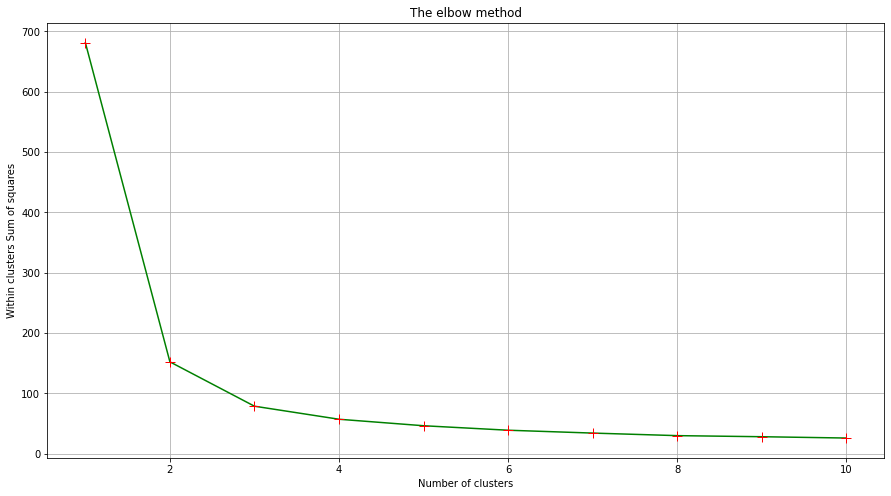

In [10]:
plt.plot(range(1, 11), wcss,"g+",linestyle="solid",markeredgecolor="r",markersize=10)
plt.rcParams["figure.figsize"]=[20,12]
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within clusters Sum of squares') # Within cluster sum of squares(wcss)
plt.grid()
plt.show()

By the elbow method, the optimum clusters we choose is 3 as the eblow occurs there. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

#### Applying kmeans to the dataset / Creating the kmeans classifier

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

#### Visualising the clusters

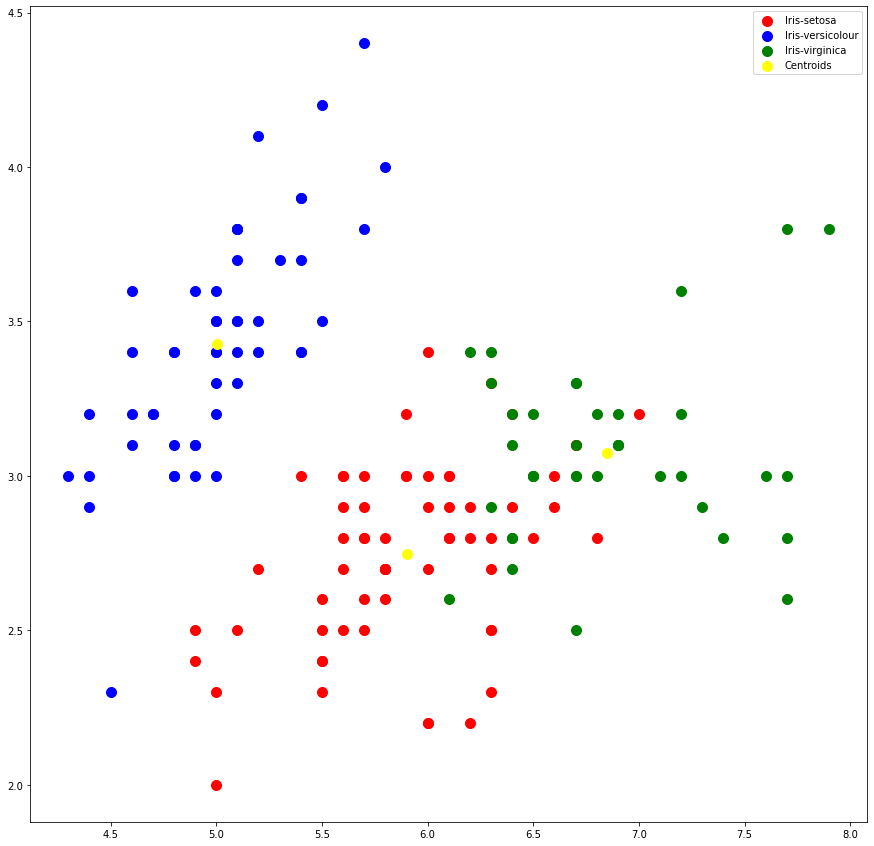

In [20]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### Hence the clusters

# Thank You